<a href="https://colab.research.google.com/github/patcon/valency-anndata/blob/main/docs/notebooks/austehen-jupyter-scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Preparation

### For fastest processing

1. Click `Edit > Notebook settings`
2. Select `T4 GPU` and save.

The runtime will restart, and the pacmap and localmap steps should run much quicker :)

In [1]:
# For some reason, this needs to be imported before we install our library.
# TODO: investigate why this is
%pip install --quiet jupyter-scatter
import jscatter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 104.6 MB/s eta 0:00:00


In [2]:
import os

if os.environ.get("IS_GENERATING_DOCS", None):
    from itables import init_notebook_mode
    init_notebook_mode(all_interactive=True) # (1)!

1. renders interactive tables for dataframes, which look really nice on the documentation website

## Installation & Import

In [3]:
%pip install -qqq \
  git+https://github.com/patcon/polis-client \
  git+https://github.com/polis-community/red-dwarf@algo-registries \
  git+https://github.com/patcon/valency-anndata@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.0/521.0 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.4 MB/s eta 0

In [4]:
import valency_anndata as val

## Loading Data

In [5]:
# Loads dataset of 33k german-speaking participants,
# run by Aufstehen political party in 2018
adata = val.datasets.aufstehen(translate_to="en")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
adata.var

,content,participant_id_authored,created_date,moderation_state,is_seed,is_meta,language_original,language_current,is_translated
comment-id,,,,,,,,,
0,I am afraid of war and conflict in the world.,0,1536009294,1,1,0,<NA>,en,True
1,I have existential fears.,0,1536009306,1,1,0,<NA>,en,True
2,The world is becoming more and more complicate...,0,1536009361,1,1,0,<NA>,en,True
3,I feel like I don't have my future in my own h...,0,1536009375,1,1,0,<NA>,en,True
5,The compatibility of family and work needs to ...,0,1536009393,1,1,0,<NA>,en,True
...,...,...,...,...,...,...,...,...,...
786,Unfortunately we still need them. Because all ...,13353,1536097480,-1,0,0,<NA>,en,True
787,How else are you supposed to look for work!,13353,1536097818,-1,0,0,<NA>,en,True
788,Without them you are hand puppets of the industry,13353,1536098089,-1,0,0,<NA>,en,True


## Running Vanilla Polis Pipeline

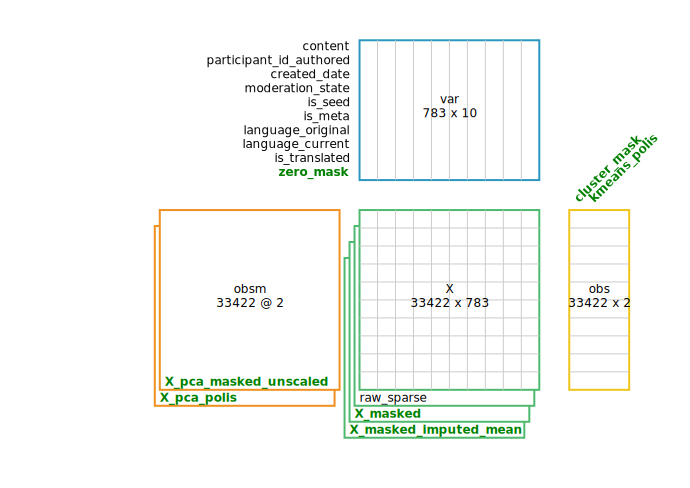

In [7]:
# Run the Polis steps and generate a "visual diff" for before and after (green = new)
with val.viz.schematic_diagram(diff_from=adata):
  # Takes ~1 minute
  val.tools.recipe_polis(adata)

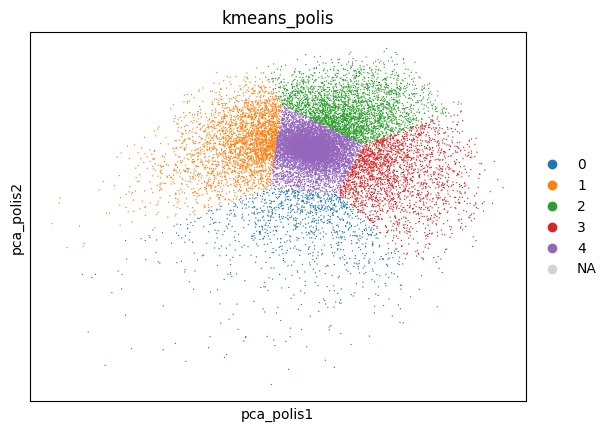

In [8]:
val.viz.embedding(adata, basis="pca_polis", color="kmeans_polis")

## Running Additional Projections: PaCMAP, LocalMAP, UMAP

In [9]:
# Takes ~1 min (~4 min without GPU)
val.tools.pacmap(adata, layer="X_masked_imputed_mean")

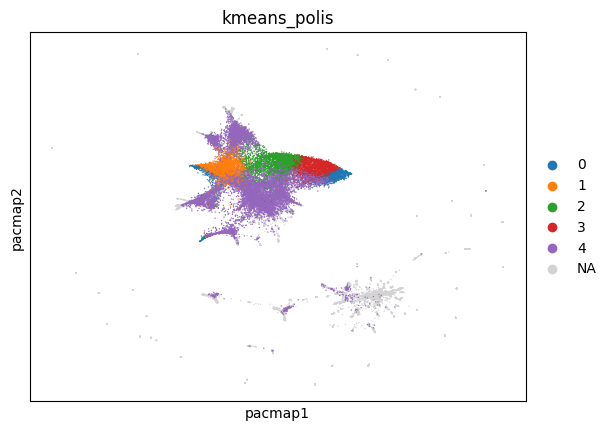

In [10]:
val.viz.embedding(adata, basis="pacmap", color="kmeans_polis")

In [11]:
# Takes ~3 min (~10 min without GPU)
val.tools.localmap(adata, layer="X_masked_imputed_mean")

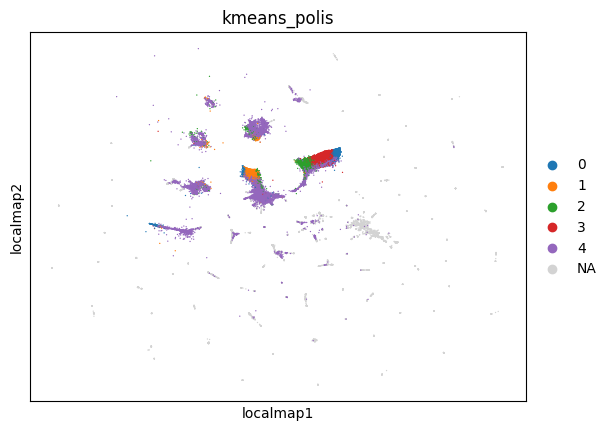

In [12]:
val.viz.embedding(adata, basis="localmap", color="kmeans_polis")

In [13]:
# Takes ~2 min
val.preprocessing.neighbors(adata, use_rep="X_pca_polis")
val.tools.umap(adata)

/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


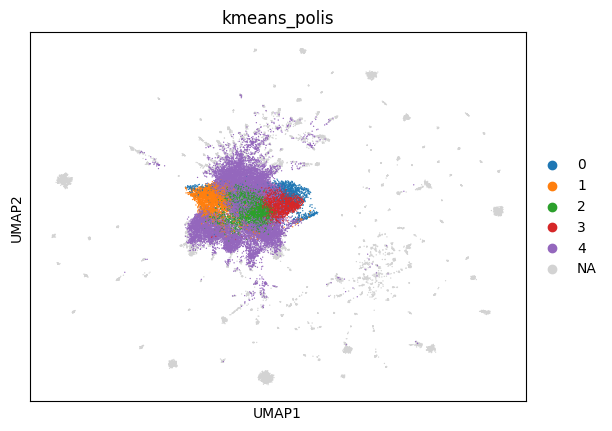

In [14]:
val.viz.embedding(adata, basis="umap", color="kmeans_polis")

## Animating 33k grouped participants

In [15]:
# Explore the differences between each projection based on the
# results of k-means clustering on the basic Polis PCA projections.
scatter_kmeans = val.viz.jscatter(
    adata,
    use_reps=[
        "X_pca_polis",
        "X_pacmap",
        "X_localmap",
        "X_umap",
    ],
    color="kmeans_polis",
)
scatter_kmeans.show()

ToggleButtons(description='Projection:', options=(('PCA', 'pca'), ('PACMAP', 'pacmap'), ('LOCALMAP', 'localmap…

## Coloring with data

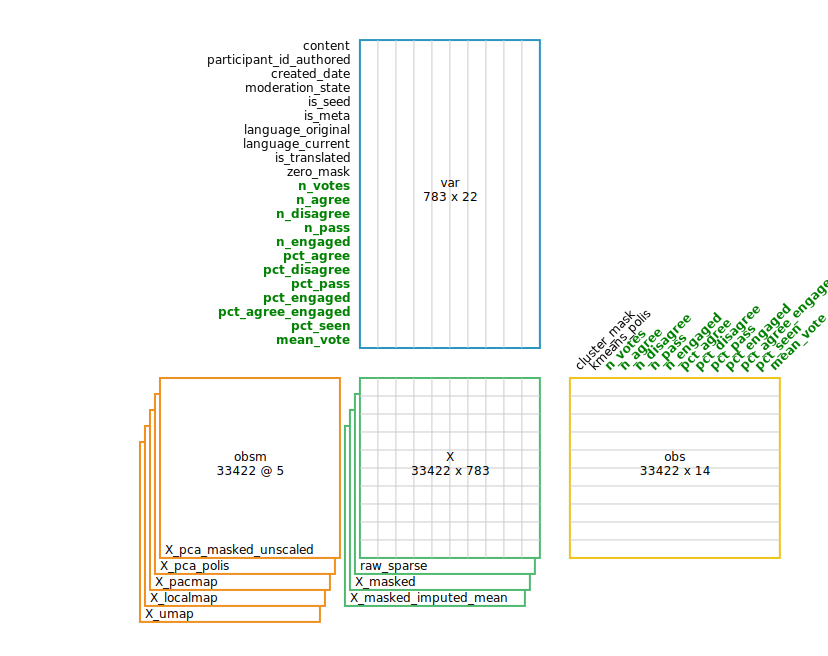

In [16]:
# Calculate general vote metrics on all participants and statements.
with val.viz.schematic_diagram(diff_from=adata):
  val.preprocessing.calculate_qc_metrics(adata, inplace=True)

In [17]:
# Explore the differences between each projection based on these metrics.
scatter_metrics = val.viz.jscatter(
    adata,
    use_reps=[
        "X_pca_polis",
        "X_pacmap",
        "X_localmap",
        "X_umap",
    ],
    color="pct_seen", # Groups from k-means clustering of PCA projections
)
scatter_metrics.show()

ToggleButtons(description='Projection:', options=(('PCA', 'pca'), ('PACMAP', 'pacmap'), ('LOCALMAP', 'localmap…